### Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Import dataset

In [2]:
data_df = pd.read_csv('CCCP.csv')

In [3]:
data_df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Define x and y

In [5]:
x=data_df.drop(['PE'], axis=1).values
y=data_df['PE'].values

In [6]:
print(x)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [7]:
print(y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


### Split the dataset in training set and test set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

### Train the model on the training set 

In [10]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [13]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.35592062])

### Predict the test set results

In [11]:
y_pred=ml.predict(x_test)
print(y_pred)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


### Evaluate the model

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9289374661293962

### Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

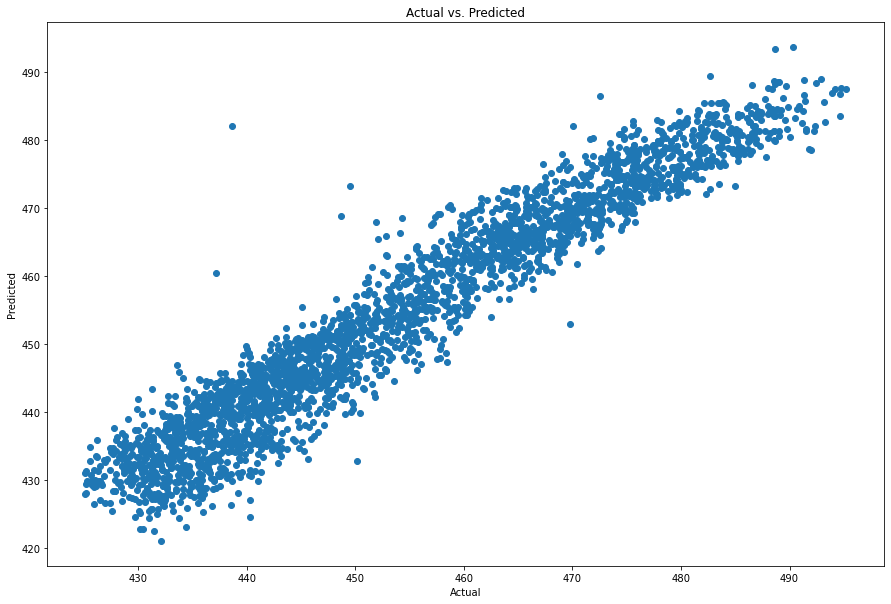

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

### Predicted values

In [18]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
5,438.00,440.810771,-2.810771
6,484.31,482.716625,1.593375
7,464.18,462.222261,1.957739
8,452.53,451.261034,1.268966
9,445.54,445.431174,0.108826
